# Multiple linear regression

Condier a set of feautrs, list of which is $x_j$, with $n$ gbeing the **number of features**. For each feature there is a set $\vec{x}^{(i)}$  of $t^{\rm th}$ training example. Now $\vec{x}^{(i)}$ is `a vector`.
A given feature is $x_j^{(i)}$. 

`Feature vector = row vector`, $\vec{x}^{(i)}$ is a set of values for different features for a single label $y^{(i)}$ 
$$
x_{\rm feature}^{(\rm training)}
$$

Multiple linear regression model:
$$
f_{w,b}=\Sigma_{i=0}^{m} w_i x_i + b = \vec{w}\cdot \vec{x} + b
$$

# Vectorization p1

Given $\vec{w} = [w_1, w_2, w_3]$ and $\vec{x}=[x_1,x_2,x_3]$.  
Vecotrization: code is shorted and runs faster

In [4]:
import numpy as np
w = np.array([1.,2.5,-3.3])
x = np.array([10,20,30])
b = 1

# without vectorization
f = 0
for j in range(0,len(w)):
    f = f + w[j] * x[j]
f = f + b

# with vectorization
f = np.dot(w,x) + b

# Gradient descent for multiple linear regression

Consider vectors of slopes $\vec{w}$ and intersect $b$. 
Then $f_{\vec{w},b} = \vec{w}\cdot \vec{x} + b$.  
Then compute $J(\vec{w},b)$

So the gradient descend 
$$
w_{j} = w_{j} - \alpha\frac{\partial}{\partial w_{j}}J(\vec{w},b) \\
b = b - \alpha \frac{\partial}{\partial b} J(\vec{w},b)
$$

In code it is 

$$
w_1 = w_1 - \alpha \frac{1}{m} \sum_{i=0}^{m}(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}) x^{(i)}_1 \\ 
... \\
w_n = w_n - \alpha \frac{1}{m} \sum_{i=0}^{m}(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}) x^{(i)}_n \\ 
b = b - \alpha \frac{1}{m} \sum_{i=0}^{m}(f_{\vec{w},b}(\vec{x}^{(i)})-y^{(i)}) \\ 
$$

Alternative way to find $w$ and $b$. `Normal equation`. Works only for linear regression. Works without iterations. But it cannot be generalized and slow. Rememeber `normal equation`.

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [3]:
# Define data (note X is a matrix now)
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# initial model parameters
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [4]:
# define cost function for multiple vatiable linear regression
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [6]:
# define gradient descend
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    # See Eq. above
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [8]:
def gradient_descent(X, y, w_in, b_in, 
                     cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if (i<100000):      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if (i % math.ceil(num_iters / 10) == 0):
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return (w, b, J_history) #return final w,b and J history for graphing

In [14]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = int(1e10)
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m, _ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   


KeyboardInterrupt: 

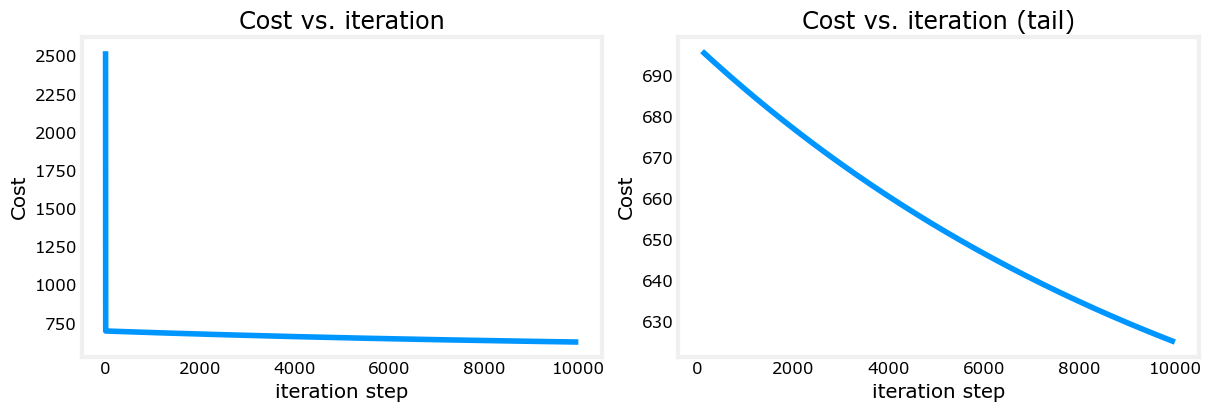

In [12]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()